
# Introduction 

<b>Machine Learning for Detecting Cyber-attacks and Problems in Industrial Control Systems Using multi class classification algorithms </b>



# Task background 

<b>The National Institute of Standards and Technology (NIST) defines an Industrial Control
System (ICS) as “An information system used to control industrial processes such as
manufacturing, product handling, production, and distribution.” ICSs may provide supervisory
control and data acquisition (SCADA) capabilities for geographically dispersed assets such as
gas or water pipelines, electricity grids, etc. 
    
 Both natural events and man-made events (cyberattacks on ICS) can compromise
the operations of power systems with devastating consequences to economies, security, and
households. Accurate detection of the man-made events (cyberattacks) on ICS controlling
powersystemsis important in devising interventionsto make the systems more resilient.
    
This work will involve building and evaluating machine learning (ML) models for detecting
power system disturbances </b>

# Methodology

- <b> Prepare a dataset for analysis, 
- Perform exploratory data analysis, 
- Perform feature engineering and feature selection, 
- Perform hyperparametertuning, and 
- Build and evaluate machine learning models.</b>

# Data Preparation


## Loading data

In [1]:
# !pip install simple_colors

In [2]:
import glob
import pandas as pd
import os
from sklearn import preprocessing

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from simple_colors import *
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 40)
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV,LassoCV
from sklearn.feature_selection import SelectFromModel
import math

In [3]:
# comment this line if you are using jupyter Notebook
# !unzip triple.zip


### Accessing multiple file in folder and load them

In [4]:
# path = '/content/triple' # Path of files when using colab

'''
Comment the previous path and uncomment the following path when using Jupyter
'''
path = './triple' # Path of files using jupyter 

# accessing files
all_files = glob.glob(os.path.join(path, "*.csv")) 


'''
The following loop with read the files into dataframe and append them into the list
'''
dataframes=[]
for data in all_files:
    file= pd.read_csv(data)
    dataframes.append(file)
    
dataframes[0]  

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,1277

#### Printing the shape of each file

In [5]:
for i in range(len(dataframes)):
    print(f'File {i+1} shape is {dataframes[i].shape}')

File 1 shape is (4966, 129)
File 2 shape is (5569, 129)
File 3 shape is (5251, 129)
File 4 shape is (5224, 129)
File 5 shape is (5271, 129)
File 6 shape is (5115, 129)
File 7 shape is (5276, 129)
File 8 shape is (5069, 129)
File 9 shape is (5415, 129)
File 10 shape is (5202, 129)
File 11 shape is (5161, 129)
File 12 shape is (4967, 129)
File 13 shape is (5236, 129)
File 14 shape is (5315, 129)
File 15 shape is (5340, 129)



## Combinning datasets

#### Checking if all dataframes have same columns

In [6]:
'''
The code will evaluate if all small datasets have same columns
'''
if all([set(dataframes[0].columns) == set(df.columns) for df in dataframes]):
    print('All have the same columns')
else:
    print('Some have different columns')

All have the same columns


#### Combination of all dataframes into one

In [7]:
# Combining all dataframes
combined_data = pd.concat(dataframes, axis=0, ignore_index=True)
display(combined_data)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,-173.589023,602.43190,70.422243,127673.0908,0.0,0.0,0.0,0.0,65.007791,611.58740,118.567886,13.18392,-100.869220,13.91636,59.999,0.01,6.391383,0.076290,0,60.658268,124631.8125,-59.295959,124484.3594,-179.338078,124715.0703,-119.550481,612.796753,117.726753,632.532104,0.859680,610.141724,60.680241,124611.9844,0.0,0.0,0.0,0.0,-120.341499,618.301392,-64.053043,12.765884,69.397891,12.828827,59.999001,0.02,6.130100,3.135101,0,60.664771,124187.9063,-59.312591,124162.8330,-179.301412,124212.9796,-119.753909,610.12252,117.685531,628.25041,0.658901,606.82654,60.687690,124187.9063,0.0,0.0,0.0,0.0,-120.487295,614.88338,-64.812986,12.08526,70.387865,11.90215,59.999,0.02,6.111440,3.140520,0,70.450890,127723.2374,-49.537931,127096.4056,-169.532482,127773.3839,65.643775,604.44611,-56.871791,621.84156,-173.869773,599.86836,70.462350,127522.6512,0.0,0.0,0.0,0.0,64.950496,608.47453,119.301272,12.26837,-102.060972,11.71904,59.999,0.01,6.341832,0.077897,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,-167.487023,481.39619,73.705291,130305.7842,0.0,0.0,0.0,0.0,71.109792,488.35437,125.792884,10.62038,-95.884487,11.35282,60.005,0.00,8.185463,0.024924,0,66.069035,128277.4297,-53.885193,128126.3047,-173.932803,128354.7578,-114.925241,489.349365,122.148740,505.754456,5.468445,487.335205,66.085509,128251.6250,0.0,0.0,0.0,0.0,-115.787662,493.978516,-59.669496,10.797501,72.424621,10.808945,60.005001,0.00,7.924891,-3.136669,0,66.062034,127823.5305,-53.909599,127798.4572,-173.892691,127848.6037,-115.124410,487.07260,122.125954,502.08762,5.259753,484.32595,66.090682,127823.5305,0.0,0.0,0.0,0.0,-115.932280,491.10102,-60.172028,10.25416,73.533403,10.07105,60.005,0.00,7.898427,-3.131062,0,73.745398,130330.8575,-46.249153,129704.0257,-166.232245,130381.0040,71.837448,481.76241,-50.792709,496.04499,-167.618803,477.73399,73.756857,130130.2713,0.0,0.0,0.0,0.0,71.121251,485.05839,124.274546,10.25416,-95.454769,9.70483,60.005,0.00,8.141328,0.027210,0.0,0,0,0,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,-167.441186,481.02997,73.751127,130330.8575,0.0,0.0,0.0,0.0,71.132710,488.35437,125.007932,10.62038,-94.520847,11.35282,60.005,0.00,8.190006,0.027904,0,66.112980,128283.9453,-53.852234,128144.4688,-173.883366,128382.9609,-114.919736,488.885864,122.214665,505.531311,5.462952,487.627014,66.129454,128269.5938,0.0,0.0,0.0,0.0,-115.765696,493.852600,-58.653259,10.396957,72.177430,10.768890,60.005001,0.00,7.931677,-3.136360,0,66.119330,127823.5305,-53.863762,

# Exploratory Data Analysis (EDA)


### dataset shape

In [8]:
print('The shape of combined data is :' , combined_data.shape)

The shape of combined data is : (78377, 129)


The comined dataset have 129 columns and 78377 entries

### Dataset info

In [9]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


The dataset have 128 numerical data and 1 object data type

#### Checking Missing Values

In [10]:
nans=combined_data.isna().sum()
nans

R1-PA1:VH     0
R1-PM1:V      0
R1-PA2:VH     0
R1-PM2:V      0
R1-PA3:VH     0
             ..
snort_log1    0
snort_log2    0
snort_log3    0
snort_log4    0
marker        0
Length: 129, dtype: int64

In [11]:
nans.sum()

0

The dataset have no missing values

#### Checking the infinity values

In [12]:
number_inf = combined_data[combined_data == np.inf].count()
print(f'The dataframe contains {number_inf.sum()} infinity values')

The dataframe contains 10906 infinity values


The dataset have 10906 infinity values which will be handled in data preparation 

### Some Visualization with data

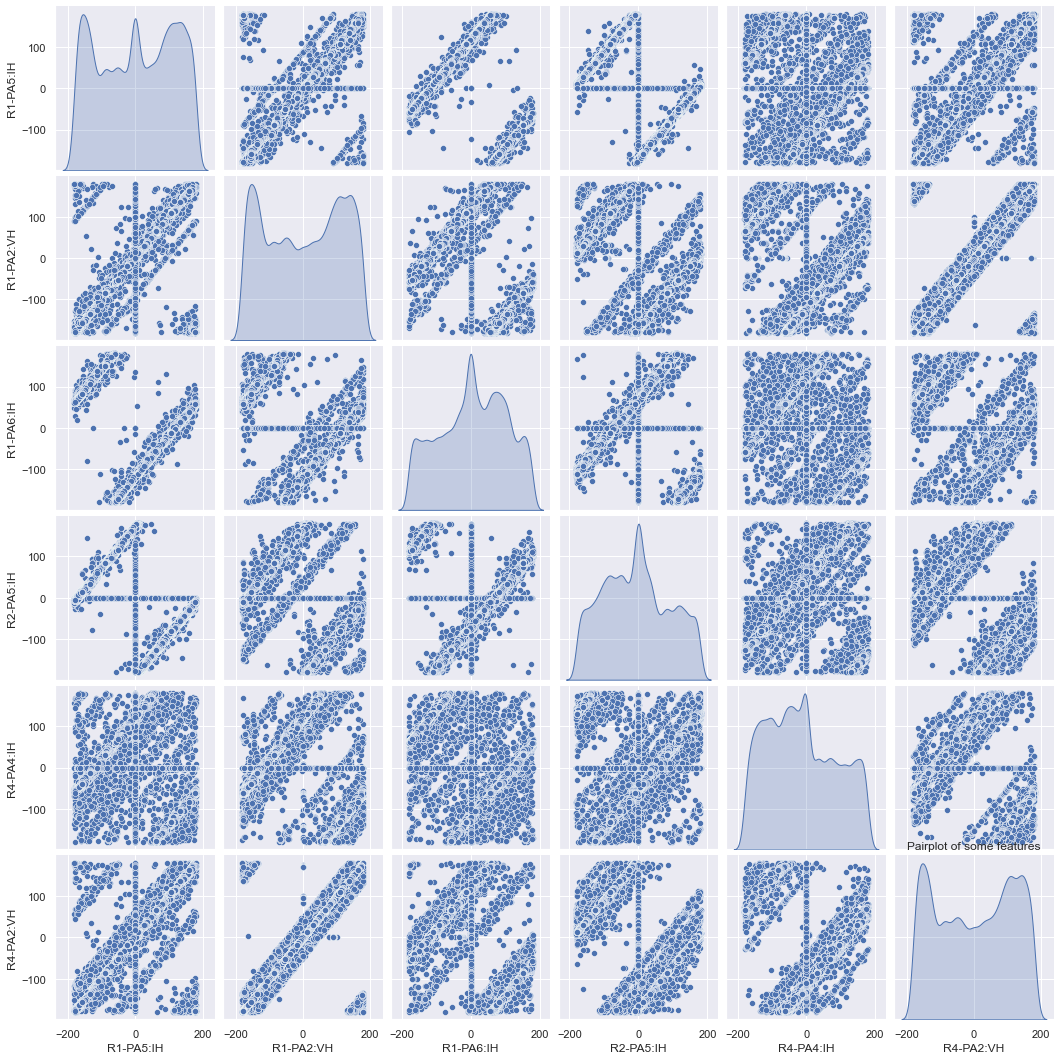

In [13]:
'''
THe following code will display pair plot of randomly selected columns 
'''
sns.set()
sns.pairplot(combined_data[['R1-PA5:IH', 'R1-PA2:VH','R1-PA6:IH','R2-PA5:IH','R4-PA4:IH','R4-PA2:VH']],diag_kind="kde")
plt.title('Pairplot of some features') 
plt.show() 

From some graphs, some  features have are correlated to each other, for example R1-PA2:VH and R1-PA2:VH, R1-PA5:IH and R1-PA6:IH and some other features are completely uncorrelated. Additionally, all selected columns are not uniformally distributed as seen on diagonal graphs.

### Correlation of variables 

In [14]:
combined_data.corr()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
R1-PA1:VH,1.000000,-0.005874,-0.351706,-0.003943,-0.302815,-0.004928,0.908797,0.005259,-0.352569,0.005332,-0.294027,0.003474,0.999445,-0.005424,-0.052679,0.003952,-0.052501,0.005363,0.916204,0.004900,0.103767,0.002629,-0.233124,0.004324,-0.001588,-0.006231,-0.002925,0.000404,0.002786,0.860721,-0.004742,-0.384588,-0.005273,-0.247012,-0.004984,-0.466351,0.003417,0.335056,0.004583,0.010345,0.003118,0.859330,-0.005256,-0.053090,0.001438,-0.048675,0.001389,-0.468625,0.003419,-0.174978,0.002665,0.424129,0.003229,-0.001312,-0.007018,0.000580,0.008185,0.002660,0.860637,-0.002668,-0.384184,-0.002386,-0.247007,-0.002279,-0.464587,0.013914,0.357619,0.014631,-0.001864,0.014877,0.859193,-0.002659,-0.053095,0.001436,-0.048693,0.001497,-0.466922,0.015911,-0.183927,-0.000359,0.415810,-0.000519,-0.001321,-0.007022,-0.010283,-0.000557,0.002626,0.956455,0.007268,-0.345709,0.009493,-0.297352,0.010641,0.885582,0.011623,-0.348959,0.015384,-0.282334,0.015488,0.956790,0.009262,-0.053078,-0.001090,-0.054164,-0.002560,0.895235,0.014910,0.103997,0.000856,-0.227217,-0.000907,-0.001564,-0.001396,-0.005751,0.007191,0.002678,-0.001291,-0.001291,0.002438,0.002438,-0.000752,-0.000900,-0.002842,-0.002683,-0.000514,0.002703,-0.002161,-0.001057
R1-PM1:V,-0.005874,1.000000,0.006212,0.782847,-0.004730,0.791613,-0.001764,-0.609219,0.002455,-0.229795,-0.004997,-0.208045,-0.005438,0.935061,-0.105255,-0.796894,-0.124424,-0.773875,-0.002525,-0.346687,0.011413,-0.733440,0.012986,-0.764848,0.148417,-0.077862,0.134554,-0.537602,-0.003813,0.003760,0.545385,-0.003834,0.247980,0.000648,0.151169,0.012401,-0.423169,0.007077,-0.245520,-0.006292,-0.217526,0.002123,0.360988,-0.086112,-0.668431,-0.080467,-0.586297,0.009431,-0.231785,-0.000362,-0.678292,0.007791,-0.581541,0.147487,-0.065690,0.103141,-0.070664,-0.002219,0.007671,0.497791,-0.011788,0.184755,-0.001860,0.087458,0.011440,-0.270617,0.003182,0.024937,-0.002447,-0.038578,0.005993,0.305904,-0.086353,-0.668430,-0.079318,-0.575759,0.007234,-0.037386,-0.000138,-0.621034,0.000944,-0.367806,0.147618,-0.066893,0.049711,-0.066386,-0.004470,0.008335,0.533945,-0.005442,0.339233,-0.007148,0.355023,0.000541,-0.275386,-0.013660,0.052152,-0.000255,-0.024064,0.007467,0.461864,-0.084730,-0.525682,-0.069047,-0.396501,0.000993,-0.069191,0.006831,-0.569330,0.007676,-0.435762,0.147281,-0.073600,0.007859,-0.361091,-0.003206,0.001550,0.001550,-0.001701,-0.001701,0.056220,-0.001740,-0.155892,-0.147115,0.000948,0.000639,-0.005561,-0.006091
R1-PA2:VH,-0.351706,0.006212,1.000000,0.001406,-0.341597,0.002648,-0.326921,-0.003683,0.904751,0.000767,-0.328050,0.000193,-0.351811,0.004158,-0.001244,-0.007639,-0.006948,-0.007383,-0.328934,-0.000688,-0.215067,-0.006907,0.095949,-0.006711,0.000445,0.000304,0.001150,-0.000608,0.018760,-0.297560,0.0085

Some features have high correlation between them as big as 0.935061 and others have very little correlation as small as -0.000130 

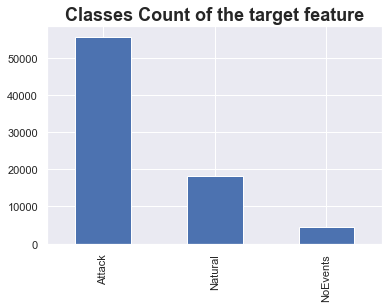

In [15]:
combined_data['marker'].value_counts().plot(kind='bar')
plt.title('Classes Count of the target feature',fontsize = 18, fontweight="bold")
plt.show()

The above figure shows the class distribution in target, the data have a little imbalance as `attach` class have around 60% of all data

## Checking for Outliers using boxplot

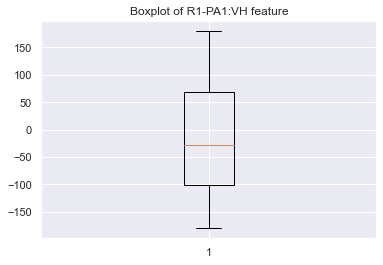

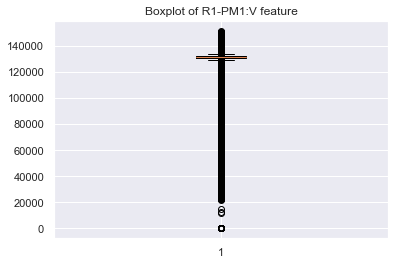

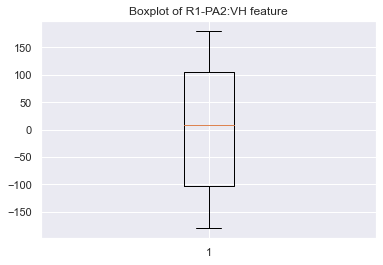

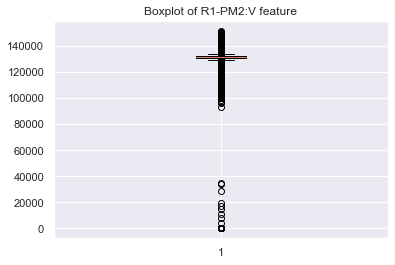

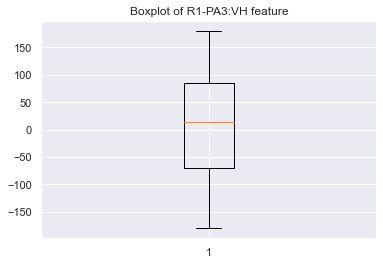

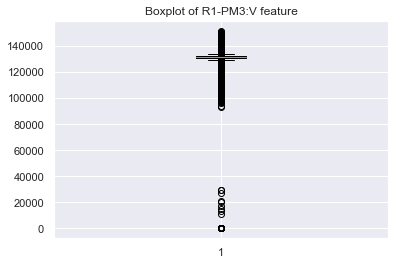

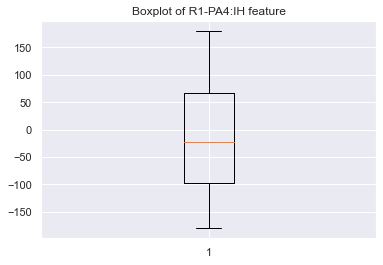

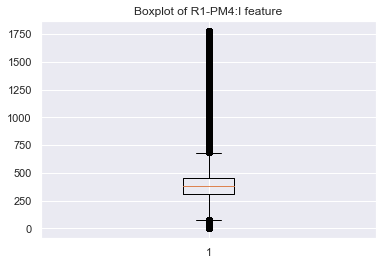

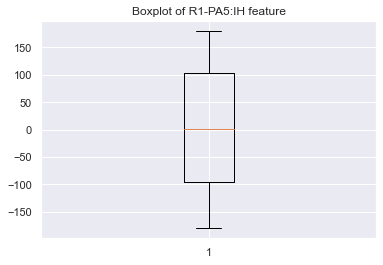

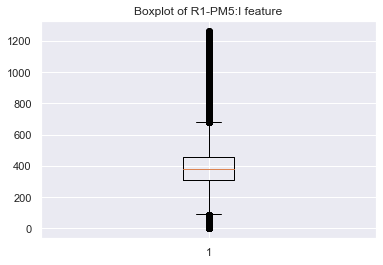

In [16]:
'''
The following code will provide box plot a some selected columns
'''
for i in combined_data.columns[:10]:
    plt.boxplot(combined_data[i])
    plt.title(f'Boxplot of {i} feature')

    plt.show()
    
    

The figures above show that some columns have outliers for example R1-PM2:V and R1-PM1:V whereas other have no outliers example R1-PA2:VH and R1-PA4:IH

# Preprocessing of data

### Setting infinity values to Nan and filling NaN with Mean

In [17]:
# Converting infinity values into NaNs
pd.set_option('mode.use_inf_as_na', True)

In [18]:
# fillina Nan Values with Mean      
combined_data=combined_data.fillna(combined_data.mean())


In [19]:

# checking for infinity values in df
number_inf2 = combined_data[combined_data == np.inf].count()
print(f'The dataframe contains {number_inf2.sum()} infinity values')

The dataframe contains 0 infinity values


In [20]:
#Cheking for Nan Values
nans=combined_data.isna().sum()
nans.sum()

0

Infinity values have been replaced by mean as they were to many to not be droped

### Replacing Outliers with upper bound and lower bound

In [21]:
'''
The following loop will impute outliers with upper limit and lower limit at
z score of 1.5 for upper limit and -1.5 for lower limit

'''

for col in combined_data.columns[:-1]:
    # find mean
    mean = combined_data[col].mean()
    # find standard deviation
    std = combined_data[col].std()
    
    #upper limit
    upper = mean + (1.5*std)
    #lower limit
    lower = mean - (1.5*std)

    newcol = []
    for val in combined_data[col]:
        if val < lower:
          # updating bottom outlier with lower limit value
          newcol.append(lower)
          # updating top outlier with upper limit value
        elif val > upper:
          newcol.append(upper)

        else:
            newcol.append(val)
    #updating the data frame
    combined_data[col] = newcol



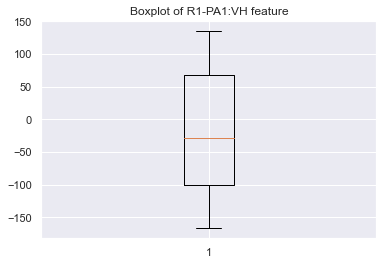

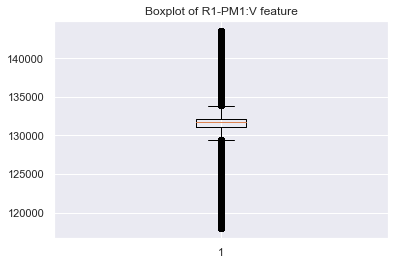

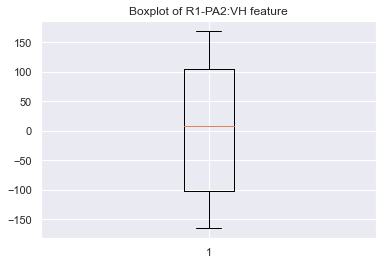

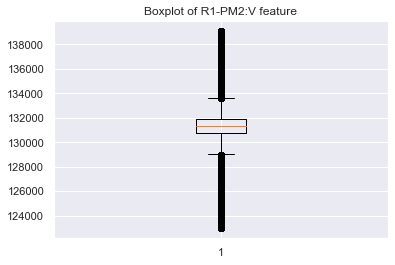

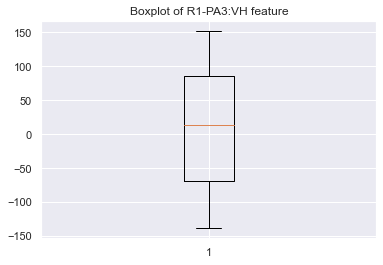

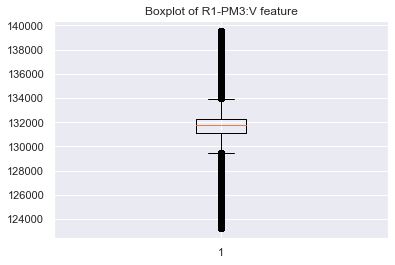

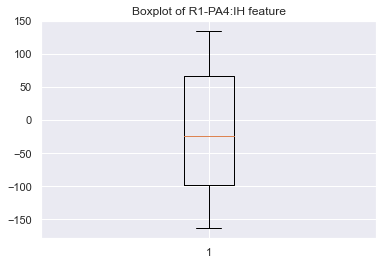

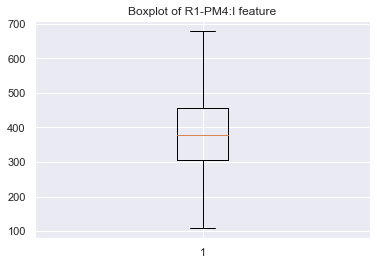

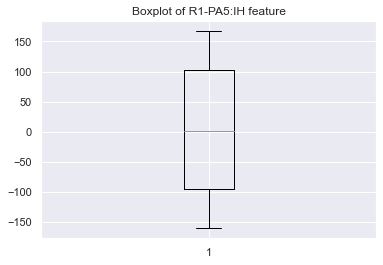

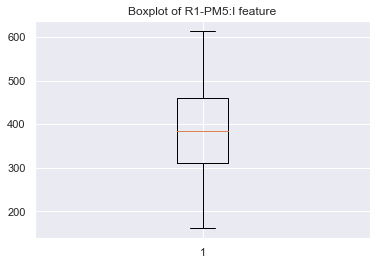

In [22]:
# checking the outliers
for i in combined_data.columns[:10]:
  plt.boxplot(combined_data[i])
  plt.title(f'Boxplot of {i} feature')

  plt.show()
    

The figures show that some oultliers have been completely removed from the data

#### Sampling the data

In [23]:
'''
Sampling 5% of combined dataset
'''
combined_data_sample= combined_data.sample(n = 3930,random_state=42)
print('The sample dataset has the shape of :')
combined_data_sample.shape

The sample dataset has the shape of :


(3930, 129)

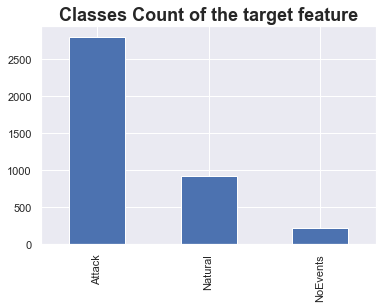

In [24]:
combined_data_sample['marker'].value_counts().plot(kind='bar')
plt.title('Classes Count of the target feature',fontsize = 18, fontweight="bold")
plt.show()

#### Sampling balanced data

In [25]:
# selecting 1310 samples of attach class
attach_data=combined_data[combined_data['marker']=='Attack']
attack_sample=attach_data.sample(n=1310,random_state=0)


# Selecting 1310 sample of Natural class
natural_data=combined_data[combined_data['marker']=='Natural']
natural_sample=natural_data.sample(n=1310,random_state=0)

#Selecting 1310 sample of NoEvents class
NoEvents_data=combined_data[combined_data['marker']=='NoEvents']
NoEvents_sample=NoEvents_data.sample(n=1310,random_state=0)


In [26]:

# Combining the balanced data
combined_data_new = pd.concat([attack_sample,natural_sample,NoEvents_sample], axis=0, ignore_index=True)
combined_data_new

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-130.491138,131007.8358,109.509423,130381.0040,-10.467939,131057.9823,-133.831482,479.93131,104.954409,485.79083,-13.630666,478.46643,-130.479679,130807.2496,0.0,0.0,0.0,0.0,-134.175256,481.39619,-81.709511,4.39464,54.872168,4.21153,59.999,0.000000,7.948247,0.054155,0.0,-137.945319,128600.8018,102.095349,128550.6553,-17.899202,128625.8751,38.932482,485.424610,-82.236632,490.734800,156.907318,484.325950,-137.916671,128600.8018,0.0,0.0,0.0,0.0,38.605896,486.706380,89.782487,4.211530,-109.776287,4.028420,60.000000,0.000000,7.702108,-3.092235,0.0,-137.968237,128550.6553,102.055243,128525.5820,-17.939309,128625.8751,38.875186,483.22729,-82.356953,487.25571,156.552640,481.02997,-137.951048,128575.7286,0.0,0.0,0.0,0.0,38.439738,483.77662,93.346284,4.39464,-109.629976,3.11287,60.000,0.00000,7.690976,-3.092702,0.0,-130.619199,131411.8750,109.437567,131254.5938,-10.604553,131493.4688,-133.871161,477.567688,104.971620,483.209595,-13.697205,477.350220,-130.597233,131387.4375,0.0,0.0,0.0,0.0,-134.195254,479.352966,-81.449890,3.833771,50.188295,4.114151,59.999001,0.000000,8.005466,0.050599,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
1,-148.344503,131760.0339,91.667518,131133.2021,-28.327033,131835.2537,-150.624875,377.57282,89.415794,377.38971,-30.595946,377.20660,-148.333044,131584.5210,0.0,0.0,0.0,0.0,-150.601957,377.38971,0.000000,0.00000,0.000000,0.00000,60.000,0.000000,9.911706,0.040965,0.0,-154.119917,130029.9782,85.932210,130004.9050,-34.073800,130055.0515,19.950390,382.150570,-99.849355,382.150570,139.967860,382.150570,-154.091269,130029.9782,0.0,0.0,0.0,0.0,20.019145,382.150570,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,9.651052,-3.035635,0.0,-154.142836,130004.9050,85.886373,129979.8317,-34.119637,130080.1248,19.870176,380.68569,-100.004054,379.95325,139.841809,378.30526,-154.125647,130004.9050,0.0,0.0,0.0,0.0,19.904554,379.77014,0.000000,0.00000,0.000000,0.00000,60.000,0.00000,9.662901,-3.031220,0.0,-148.461005,132185.8281,91.595767,132036.2656,-28.446351,132273.1406,-150.647281,375.829712,89.513857,376.092895,-30.561220,376.213074,-148.439026,132166.5313,0.0,0.0,0.0,0.0,-150.570373,376.052856,0.000000,0.000000,0.000000,0.000000,59.999001,0.000000,9.997838,0.039889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Attack
2,-24.241844,131835.2537,-144.230666,131208.4219,95.769895,131885.4002,-25.427867,366.22000,-145.336474,366.40311,93.518171,369.69909,-24.230385,131634.6675,0.0,0.0,0.0,0.0,-25.742994,367.31866,0.000000,0.00000,0.000000,0.00000,60.000,0.000000,10.071002,0.010359,0.0,-29.891208,130155.3446,-149.851382,130105.1980,90.149179,130155.3446,145.015618,371.530190,25.032526,371.530190,-95.970431,374.459950,-29.862560,130155.3446,0.0,0.0,0.0,0.0,144.694762,372.445740,0.000000,

## Shuffing the data in a random order

In [27]:
##shuffing the data in a random order
combined_data = combined_data_new.sample(frac=1,random_state=42).reset_index(drop=True)
combined_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-167.117549,131634.6675,64.262946,130982.7625,-55.743064,131684.8140,-163.736656,389.84119,61.753391,397.16559,-56.212889,388.19320,-167.114512,131434.0813,0.0,0.0,0.0,0.0,-163.911819,391.67229,-104.309822,5.31019,11.613855,4.94397,60.000,0.00,9.945316,0.005697,0.0,137.539942,129779.2455,58.189594,129754.1723,-61.793498,129829.3921,-5.402992,395.151380,-127.064850,401.926450,115.061384,392.770950,137.577187,129779.2455,0.0,0.0,0.0,0.0,-5.809792,396.616260,42.782759,5.310190,-109.776287,5.127080,60.000,0.00,9.680043,-3.082438,0.0,137.533088,129729.0990,58.166675,129704.0257,-61.839335,129804.3188,-5.718119,392.95406,-127.179442,400.27846,115.015548,390.02430,137.565871,129754.1723,0.0,0.0,0.0,0.0,-5.970220,394.41894,40.187260,5.31019,-109.629976,5.49330,60.000,0.00,9.759546,-3.071601,0.0,-166.906652,132041.6094,64.190371,131898.3125,-55.840761,132125.4375,-163.411686,387.439728,61.839296,395.513550,-56.175844,387.256622,-166.887331,132021.6719,0.0,0.0,0.0,0.0,-163.586261,390.020386,-103.535880,4.886627,9.857484,5.264282,60.000000,0.00,10.054975,0.001242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Natural
1,40.685733,129954.7584,-79.280170,129929.6851,152.431910,130029.9782,36.245310,511.42623,-82.271010,506.84848,149.072137,504.65116,40.708651,129979.8317,0.0,0.0,0.0,0.0,37.305282,507.58092,-21.462999,4.76086,-38.926753,5.49330,60.000,0.01,7.232697,0.107515,0.0,32.890322,128159.4063,-87.063909,128011.6641,149.915586,128243.0000,-133.977704,516.059875,91.018985,510.446533,-28.825379,509.937286,32.906800,128139.5781,0.0,0.0,0.0,0.0,-133.945239,512.111694,114.087436,4.846573,100.706546,4.812241,60.000,0.01,7.050860,-3.058688,0.0,32.887777,127698.1641,-87.066667,127673.0908,149.914955,127723.2374,-134.365416,534.13187,89.243906,528.27235,-30.721997,527.35680,32.916425,127698.1641,0.0,0.0,0.0,0.0,-134.139006,529.92034,113.425915,4.76086,100.688090,5.12708,60.000,0.00,6.773750,-3.027142,0.0,40.989401,130681.8832,-79.005150,130055.0515,152.694732,130732.0298,34.463411,527.723020,-84.133123,520.947950,149.339705,520.215510,40.995130,130506.3704,0.0,0.0,0.0,0.0,35.420251,522.962160,-22.838098,4.943970,-29.833912,5.127080,60.000000,0.00,7.011152,0.140442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Natural
2,72.353110,134417.8005,-47.629982,133765.8955,-138.763279,134467.9470,72.204141,271.18591,-47.796139,271.73524,-136.812575,270.45347,72.370299,134217.2143,0.0,0.0,0.0,0.0,72.290085,271.18591,0.000000,0.00000,0.000000,0.00000,59.999,-0.04,14.152877,0.007116,0.0,68.262192,133063.8439,-51.715171,133013.6974,-138.894765,133113.9904,-121.054523,277.045430,119.089278,276.496100,-0.830789,275.763660,68.290840,133063.8439,0.0,0.0,0.0,0.0,-120.928472,276.496100,0.000000,0.000000,0.000000,0.000000,59.988,0.00,13

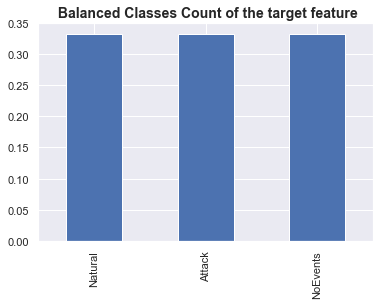

In [28]:
combined_data['marker'].value_counts(normalize=True).plot(kind='bar')
plt.title(' Balanced Classes Count of the target feature',fontsize = 14, fontweight="bold")
plt.show()

## Scalling data using Min Max Scaler

In [29]:
# removing target
x = combined_data.drop('marker', axis = 1)
# Min max scalling 
scaler = preprocessing.MinMaxScaler()
good_output = scaler.fit_transform(x)
X=pd.DataFrame(good_output,columns=x.columns)
X

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,R1-PA6:IH,R1-PM6:I,R1-PA7:VH,R1-PM7:V,R1-PA8:VH,R1-PM8:V,R1-PA9:VH,R1-PM9:V,R1-PA10:IH,R1-PM10:I,R1-PA11:IH,R1-PM11:I,R1-PA12:IH,R1-PM12:I,R1:F,R1:DF,R1-PA:Z,R1-PA:ZH,R1:S,R2-PA1:VH,R2-PM1:V,R2-PA2:VH,R2-PM2:V,R2-PA3:VH,R2-PM3:V,R2-PA4:IH,R2-PM4:I,R2-PA5:IH,R2-PM5:I,R2-PA6:IH,R2-PM6:I,R2-PA7:VH,R2-PM7:V,R2-PA8:VH,R2-PM8:V,R2-PA9:VH,R2-PM9:V,R2-PA10:IH,R2-PM10:I,R2-PA11:IH,R2-PM11:I,R2-PA12:IH,R2-PM12:I,R2:F,R2:DF,R2-PA:Z,R2-PA:ZH,R2:S,R3-PA1:VH,R3-PM1:V,R3-PA2:VH,R3-PM2:V,R3-PA3:VH,R3-PM3:V,R3-PA4:IH,R3-PM4:I,R3-PA5:IH,R3-PM5:I,R3-PA6:IH,R3-PM6:I,R3-PA7:VH,R3-PM7:V,R3-PA8:VH,R3-PM8:V,R3-PA9:VH,R3-PM9:V,R3-PA10:IH,R3-PM10:I,R3-PA11:IH,R3-PM11:I,R3-PA12:IH,R3-PM12:I,R3:F,R3:DF,R3-PA:Z,R3-PA:ZH,R3:S,R4-PA1:VH,R4-PM1:V,R4-PA2:VH,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PA4:IH,R4-PM4:I,R4-PA5:IH,R4-PM5:I,R4-PA6:IH,R4-PM6:I,R4-PA7:VH,R4-PM7:V,R4-PA8:VH,R4-PM8:V,R4-PA9:VH,R4-PM9:V,R4-PA10:IH,R4-PM10:I,R4-PA11:IH,R4-PM11:I,R4-PA12:IH,R4-PM12:I,R4:F,R4:DF,R4-PA:Z,R4-PA:ZH,R4:S,control_panel_log1,control_panel_log2,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
0,0.000000,0.533958,0.685210,0.496739,0.285102,0.517702,0.000000,0.492829,0.677206,0.521434,0.281931,0.513654,0.000000,0.520431,0.494701,0.0,0.493925,0.0,0.000000,0.511037,0.000000,0.065685,0.525050,0.060806,0.503934,0.497993,0.329072,0.482523,0.0,1.000000,0.696896,0.660413,0.629552,0.266962,0.540785,0.429114,0.500081,0.078568,0.520604,0.871909,0.512155,1.000000,0.641756,0.494438,0.0,0.494839,0.0,0.427729,0.515417,0.680256,0.064476,0.000000,0.078904,0.496602,0.498370,0.311278,0.014542,0.0,1.000000,0.697712,0.660334,0.630945,0.266853,0.544952,0.428997,0.501925,0.078404,0.524092,0.872600,0.512630,1.000000,0.643315,0.494425,0.0,0.494966,0.0,0.427736,0.517788,0.670202,0.066088,0.000000,0.059844,0.496617,0.498869,0.295566,0.017799,0.0,0.000000,0.538579,0.684542,0.538242,0.284018,0.526538,0.000000,0.493067,0.677657,0.524883,0.282635,0.516131,0.000000,0.537549,0.493483,0.0,0.494487,0.0,0.000000,0.513145,0.000000,0.060196,0.517888,0.067429,0.503962,0.497699,0.134717,0.479339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.686657,0.468435,0.257016,0.431651,1.000000,0.416373,0.669276,0.705057,0.238796,0.763116,1.000000,0.766834,0.686721,0.441641,0.494701,0.0,0.493925,0.0,0.673383,0.761135,0.403836,0.058890,0.294458,0.067562,0.503934,0.535958,0.237564,0.622298,0.0,0.657462,0.655055,0.224386,0.574424,1.000000,0.496685,0.000000,0.734720,0.843806,0.758028,0.431469,0.764863,0.657495,0.591697,0.494438,0.0,0.494839,0.0,0.000000,0.768195,1.000000,0.058846,1.000000,0.074058,0.496602,0.531827,0.225736,0.020382,0.0,0.657468,0.645393,0.224407,0.567070,1.000000,0.487075,0.000000,0.770127,0.836941,0.797830,0.425602,0.802356,0.657548,0.580818,0.494425,0.0,0.494966,0.0,0.000000,0.817421,1.000000,0.059252,1.000000,0.055854,0.496617,0.498869,0.203548,0.029108,0.0,0.686935,0.481817,0.257712,0.408450,1.000000,0.429321,0.661878,0.743001,0.233547,0.805718,1.000000,0.809775,0.686881,0.446319,0.493483,0.0,0.494487,0.0,0.665833,0.805171,0.396838,0.060903,0.334354,0.065672,0.503962,0.497699,0.092955,0.666418,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.791298,0.642512,0.351430,0.668756,0.000000,0.688120,0.789619,0.285715,0.343737,0.245053,0.000000,0.257686,0.791342,0.671220,0.494701,0.0,0.493925,0.0,0.790462,0.251062,0.508457,0.000000,0.472062,0.000000,0.503387,0.346131,0.471009,0.484470,0.0,0.773241,0.781740,0.330497,0.732675,0.000000,0.632093,0.043131,0.270882,0.942302,0.246183,0.517161,0.259791,0.773279,0.742034,0.494438,0.0,0.494839,0.0,0.043451,0.252516,0.488409,0.000000,0.521545,0.000000,0.490362,0.498370,0.440279,0.041317,0.0,0.773164,0.782327,0.330448,0.734249,0.000000,0.636299,0.068309,0.467835,0.970824,0.458300,0.534944,0.495633,0.773175,0.743156,0.494425,0.0,0.494966,0.0,0.067721,0.475677,0.951506,0.077483,0.157054,0.061839

## Label Encoding of the target

In [30]:
target=combined_data[['marker']]

label_encoder = preprocessing.LabelEncoder()
  
y= label_encoder.fit_transform(target['marker'])
  
y

array([1, 1, 1, ..., 0, 2, 2])

# Model creation and evaluation

### 1. LogisticRegression

In [31]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)
logreg = LogisticRegression(multi_class='multinomial')

accuracy= cross_val_score(logreg, X, y, scoring='accuracy', cv=10).mean()
logloss = cross_val_score(logreg, X, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc = cross_val_score(logreg, X, y, scoring="roc_auc_ovo", cv = 10).mean()



In [32]:
print(blue('The accuracy of Rogistic Regression model :'),accuracy) 
print(blue('The Log Loss of Rogistic Regression model :'),np.absolute(logloss))
print(blue('The ROC AUC of Rogistic Regression model :'),roc_auc)

The accuracy of Rogistic Regression model : 0.640203562340967
The Log Loss of Rogistic Regression model : 0.8221554683721584
The ROC AUC of Rogistic Regression model : 0.8099741662296293


### 2. KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier()

accuracy_knn= cross_val_score(knn, X, y, scoring='accuracy', cv=10).mean()
logloss_knn = cross_val_score(knn, X, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc_knn = cross_val_score(knn, X, y, scoring="roc_auc_ovo", cv = 10).mean()


In [34]:
print(blue('The accuracy of KNeighborsClassifier model :'),accuracy_knn) 
print(blue('The Log Loss of KNeighborsClassifier model :'),np.absolute(logloss_knn))
print(blue('The ROC AUC of KNeighborsClassifier model :'),roc_auc_knn)

The accuracy of KNeighborsClassifier model : nan
The Log Loss of KNeighborsClassifier model : nan
The ROC AUC of KNeighborsClassifier model : nan


### 3. RandomForestClassifier

In [35]:
forest=RandomForestClassifier(random_state=42)
accuracy_forest= cross_val_score(forest, X, y, scoring='accuracy', cv=10, n_jobs=-1).mean()
logloss_forest = cross_val_score(forest, X, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc_forest = cross_val_score(forest, X, y, scoring="roc_auc_ovo", cv = 10).mean()


In [36]:
print(blue('The accuracy of RandomForestClassifier model :'), accuracy_forest) 
print(blue('The Log Loss of RandomForestClassifier model :'), np.absolute(logloss_forest))
print(blue('The ROC AUC of RandomForestClassifier model :' ), roc_auc_forest)

The accuracy of RandomForestClassifier model : 0.7422391857506362
The Log Loss of RandomForestClassifier model : 0.5858035066108493
The ROC AUC of RandomForestClassifier model : 0.8945112949905794


# Feature Selection and Engineering

In [37]:
selector = SelectFromModel(estimator=LogisticRegression(random_state=42)).fit(X, y)
X.columns[selector.get_support()]

Index(['R1-PM1:V', 'R1-PM2:V', 'R1-PM3:V', 'R1-PM11:I', 'R1-PM12:I',
       'R1-PA:ZH', 'R2-PM1:V', 'R2-PM2:V', 'R2-PM3:V', 'R2-PM7:V', 'R2-PM11:I',
       'R2-PM12:I', 'R2-PA:ZH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PM3:V', 'R3-PM4:I',
       'R3-PM7:V', 'R3-PM11:I', 'R3-PM12:I', 'R3-PA:Z', 'R4-PM1:V', 'R4-PM2:V',
       'R4-PA3:VH', 'R4-PM3:V', 'R4-PM6:I', 'R4-PM7:V', 'R4-PM9:V',
       'R4-PM10:I', 'R4-PM11:I', 'R4-PM12:I', 'R4-PA:Z', 'R4-PA:ZH',
       'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log'],
      dtype='object')

In [38]:
selector.threshold_

1.6601086563947685

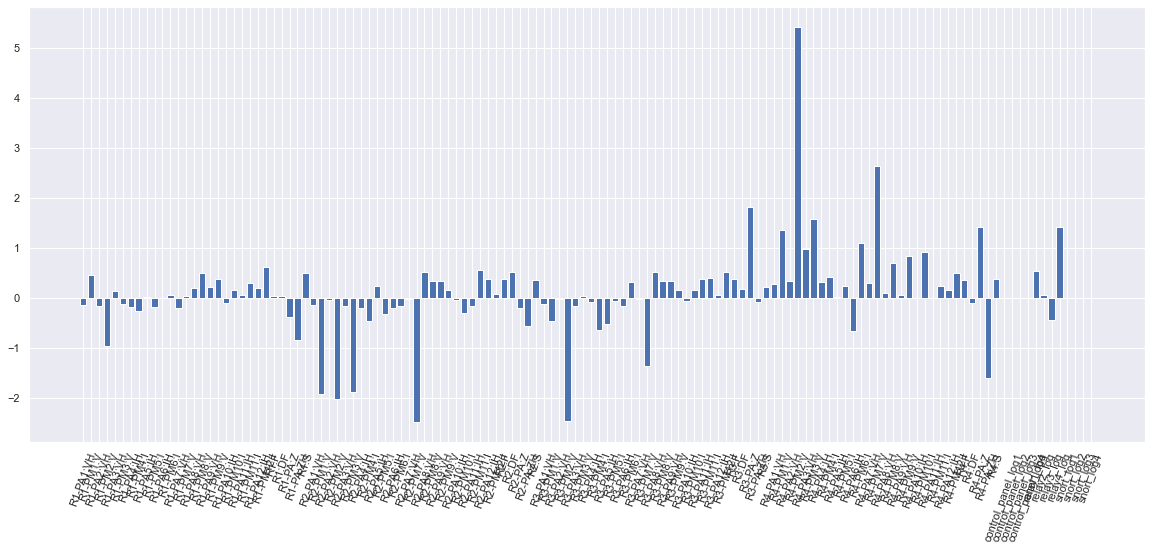

In [39]:

plt.figure(figsize=(20,8)) 
plt.bar(X.columns,selector.estimator_.coef_[0])
plt.xticks(rotation=70)
plt.show()
# list(selector.estimator_.coef_[0])

In [40]:
selected_features=X.columns[selector.get_support()]
selected_features

Index(['R1-PM1:V', 'R1-PM2:V', 'R1-PM3:V', 'R1-PM11:I', 'R1-PM12:I',
       'R1-PA:ZH', 'R2-PM1:V', 'R2-PM2:V', 'R2-PM3:V', 'R2-PM7:V', 'R2-PM11:I',
       'R2-PM12:I', 'R2-PA:ZH', 'R3-PM1:V', 'R3-PM2:V', 'R3-PM3:V', 'R3-PM4:I',
       'R3-PM7:V', 'R3-PM11:I', 'R3-PM12:I', 'R3-PA:Z', 'R4-PM1:V', 'R4-PM2:V',
       'R4-PA3:VH', 'R4-PM3:V', 'R4-PM6:I', 'R4-PM7:V', 'R4-PM9:V',
       'R4-PM10:I', 'R4-PM11:I', 'R4-PM12:I', 'R4-PA:Z', 'R4-PA:ZH',
       'relay1_log', 'relay2_log', 'relay3_log', 'relay4_log'],
      dtype='object')

In [41]:
X_import=X[selected_features]
X_import

,R1-PM1:V,R1-PM2:V,R1-PM3:V,R1-PM11:I,R1-PM12:I,R1-PA:ZH,R2-PM1:V,R2-PM2:V,R2-PM3:V,R2-PM7:V,R2-PM11:I,R2-PM12:I,R2-PA:ZH,R3-PM1:V,R3-PM2:V,R3-PM3:V,R3-PM4:I,R3-PM7:V,R3-PM11:I,R3-PM12:I,R3-PA:Z,R4-PM1:V,R4-PM2:V,R4-PA3:VH,R4-PM3:V,R4-PM6:I,R4-PM7:V,R4-PM9:V,R4-PM10:I,R4-PM11:I,R4-PM12:I,R4-PA:Z,R4-PA:ZH,relay1_log,relay2_log,relay3_log,relay4_log
0,0.533958,0.496739,0.517702,0.065685,0.060806,0.482523,0.696896,0.629552,0.540785,0.641756,0.064476,0.078904,0.014542,0.697712,0.630945,0.544952,0.501925,0.643315,0.066088,0.059844,0.295566,0.538579,0.538242,0.284018,0.526538,0.516131,0.537549,0.0,0.513145,0.060196,0.067429,0.134717,0.479339,0.0,0.0,0.0,0.0
1,0.468435,0.431651,0.416373,0.058890,0.067562,0.622298,0.655055,0.574424,0.496685,0.591697,0.058846,0.074058,0.020382,0.645393,0.567070,0.487075,0.770127,0.580818,0.059252,0.055854,0.203548,0.481817,0.408450,1.000000,0.429321,0.809775,0.446319,0.0,0.805171,0.060903,0.065672,0.092955,0.666418,0.0,0.0,0.0,0.0
2,0.642512,0.668756,0.688120,0.000000,0.000000,0.484470,0.781740,0.732675,0.632093,0.742034,0.000000,0.000000,0.041317,0.782327,0.734249,0.636299,0.467835,0.743156,0.077483,0.061839,0.293429,0.660568,0.743741,0.000000,0.730586,0.498957,0.713374,0.0,0.475098,0.083246,0.082748,0.131570,0.420359,0.0,0.0,0.0,0.0
3,0.748131,0.873316,0.857002,0.244622,0.220703,0.411605,0.833552,0.796928,0.687157,0.803272,0.233446,0.281799,1.000000,0.835938,0.779986,0.694176,0.598283,0.799555,0.234727,0.193496,0.294528,0.771893,0.930920,0.000000,0.917260,0.620553,0.874055,0.0,0.638235,0.223727,0.225888,0.133694,0.415839,0.0,0.0,0.0,0.0
4,0.530046,0.530832,0.513096,0.000000,0.000000,0.545065,0.710336,0.642335,0.555877,0.656926,0.000000,0.000000,0.024070,0.699650,0.633311,0.545649,0.501230,0.644839,0.000000,0.000000,0.284260,0.519498,0.472009,0.278314,0.494046,0.516986,0.499153,0.0,0.508730,0.000000,0.000000,0.128545,0.538304,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,0.666960,0.707498,0.726502,0.000000,0.000000,0.574943,0.773320,0.723156,0.622335,0.732082,0.000000,0.000000,0.054560,0.774576,0.724786,0.627931,0.279989,0.733248,0.000000,0.000000,0.425493,0.595040,0.632917,1.000000,0.620872,0.277083,0.618838,0.0,0.271715,0.000000,0.000000,0.188546,0.282057,0.0,0.0,0.0,0.0
3926,0.647401,0.676504,0.695796,0.269537,0.254484,0.186853,0.787568,0.740607,0.637670,0.748923,0.262349,0.315615,1.000000,0.788786,0.741346,0.643272,0.260161,0.750015,0.266632,0.223418,0.550645,0.662529,0.746344,0.563619,0.733859,0.229302,0.715981,0.0,0.253703,0.259394,0.256818,0.249821,0.196469,0.0,0.0,0.0,0.0
3927,0.530046,0.527733,0.511561,0.054360,0.067562,0.607037,0.691068,0.622413,0.533815,0.634867,0.055582,0.076086,0.032802,0.693837,0.608076,0.540768,0.527667,0.632644,0.056973,0.051865,0.272514,0.527098,0.518456,0.871417,0.506615,0.537147,0.520664,0.0,0.532439,0.056601,0.060833,0.123673,0.577900,0.0,0.0,0.0,0.0
3928,0.527112,0.523084,0.506955,0.000000,0.000000,0.532089,0.703599,0.634228,0.549354,0.649213,0.000000,0.000000,0.020792,0.693837,0.625425,0.539373,0.546452,0.637980,0.000000,0.000000,0.268628,0.516358,0.466712,0.344785,0.487049,0.569154,0.494625,0.0,0.561019,0.000000,0.000000,0.121810,0.540098,0.0,0.0,0.0,0.0


### 1. Logistic regression

## Modelling using important features

In [42]:

logreg = LogisticRegression(multi_class='multinomial',random_state=42)

accuracy_log_imp= cross_val_score(logreg, X_import, y, scoring='accuracy', cv=10).mean()
logloss_log_imp = cross_val_score(logreg, X_import, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc_log_imp = cross_val_score(logreg, X_import, y, scoring="roc_auc_ovo", cv = 10).mean()


In [43]:
print(blue('The accuracy of Rogistic Regression model with important features :'),accuracy_log_imp) 
print(blue('The Log Loss of Rogistic Regression model with important features  :'),np.absolute(logloss_log_imp))
print(blue('The ROC AUC of Rogistic Regression model with important features  :'),roc_auc_log_imp)

The accuracy of Rogistic Regression model with important features : 0.6422391857506361
The Log Loss of Rogistic Regression model with important features  : 0.8139902866293557
The ROC AUC of Rogistic Regression model with important features  : 0.8168230289610163


 ### 2. KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier()

accuracy_knn_imp= cross_val_score(knn, X_import, y, scoring='accuracy', cv=10).mean()
logloss_knn_imp = cross_val_score(knn, X_import, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc_knn_imp = cross_val_score(knn, X_import, y, scoring="roc_auc_ovo", cv = 10).mean()


In [45]:
print(blue('The accuracy of KNeighborsClassifier model with important features  :'),accuracy_knn_imp) 
print(blue('The Log Loss of KNeighborsClassifier model with important features :'),np.absolute(logloss_knn_imp))
print(blue('The ROC AUC of KNeighborsClassifier model with important features  :'),roc_auc_knn_imp)

The accuracy of KNeighborsClassifier model with important features  : nan
The Log Loss of KNeighborsClassifier model with important features : nan
The ROC AUC of KNeighborsClassifier model with important features  : nan



#### 3. RandomForestClassifier

In [46]:
forest=RandomForestClassifier(random_state=42)
accuracy_forest_imp= cross_val_score(forest, X_import, y, scoring='accuracy', cv=10).mean()
logloss_forest_imp = cross_val_score(forest, X_import, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc_forst_imp = cross_val_score(forest, X_import, y, scoring="roc_auc_ovo", cv = 10).mean()


In [47]:
print(blue('The accuracy of RandomForestClassifier model :'),accuracy_forest_imp) 
print(blue('The Log Loss of RandomForestClassifier model :'),np.absolute(logloss_forest_imp))
print(blue('The ROC AUC of RandomForestClassifier model :'),roc_auc_forst_imp)

The accuracy of RandomForestClassifier model : 0.7254452926208652
The Log Loss of RandomForestClassifier model : 0.5891528040418693
The ROC AUC of RandomForestClassifier model : 0.8831978517180428


### Metrics tables 

In [48]:
accuracies=[accuracy,accuracy_knn,accuracy_forest]

loglossess=[np.absolute(logloss),np.absolute(logloss_knn),np.absolute(logloss_forest)]

Roc_aucssss=[roc_auc,roc_auc_knn,roc_auc_forest]

metriz_all = pd.DataFrame(accuracies,columns=['Accuracies'],index=['LogisticRegression','KNeighborsClassifier','RandomForestClassifier'])
metriz_all['log lossess']=loglossess
metriz_all['ROC AUC']=Roc_aucssss
print(blue('                                 Metric table with all features '))
metriz_all.T


                                 Metric table with all features 


,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
Accuracies,0.640204,NaN,0.742239
log lossess,0.822155,NaN,0.585804
ROC AUC,0.809974,NaN,0.894511


In [49]:
accuracies_imp=[accuracy_log_imp,accuracy_knn_imp,accuracy_forest_imp]

loglossess_imp=[np.absolute(logloss_log_imp),np.absolute(logloss_knn_imp),np.absolute(logloss_forest_imp)]

Roc_aucssss_imp=[roc_auc_log_imp,roc_auc_knn_imp,roc_auc_forst_imp]

metriz_all_imp = pd.DataFrame(accuracies_imp,columns=['Accuracies'],index=['LogisticRegression','KNeighborsClassifier','RandomForestClassifier'])
metriz_all_imp['log lossess']=loglossess_imp
metriz_all_imp['ROC AUC']=Roc_aucssss_imp
print(blue('                                 Metric table with important features '))
metriz_all_imp.T

                                 Metric table with important features 


,LogisticRegression,KNeighborsClassifier,RandomForestClassifier
Accuracies,0.642239,NaN,0.725445
log lossess,0.813990,NaN,0.589153
ROC AUC,0.816823,NaN,0.883198


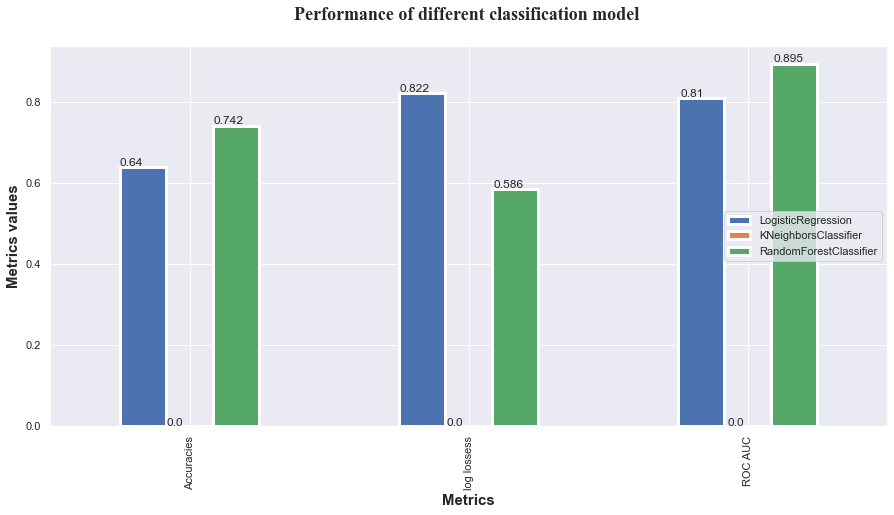

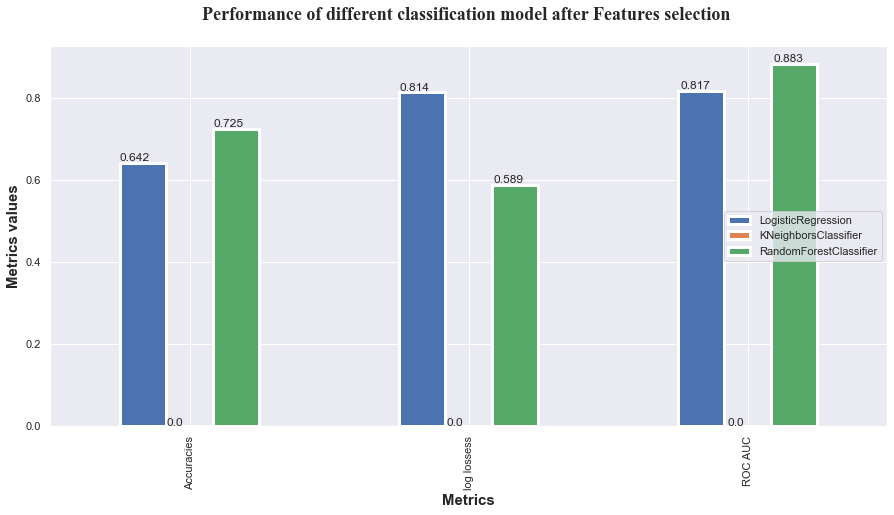

In [50]:


plt.rcParams["figure.figsize"] = (15,7)
ax1=metriz_all.T.plot(kind='bar',edgecolor='white',linewidth=3)

# plt.yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1), fontsize = 10)
plt.legend(loc='right')
plt.xlabel('Metrics',fontsize = 15,fontweight="bold")
plt.ylabel('Metrics values',fontsize = 15,fontweight="bold")
plt.title('Performance of different classification model \n',
          fontsize = 18,fontname="Times New Roman", fontweight="bold")
for p in ax1.patches:
    ax1.annotate(str(p.get_height().round(3)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()


plt.rcParams["figure.figsize"] = (15,7)
ax=metriz_all_imp.T.plot(kind='bar',edgecolor='white',linewidth=3)

# plt.yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1), fontsize = 10)
plt.legend(loc='right')
plt.xlabel('Metrics',fontsize = 15,fontweight="bold")
plt.ylabel('Metrics values',fontsize = 15,fontweight="bold")

plt.title('Performance of different classification model after Features selection \n',
          fontsize = 18,fontname="Times New Roman", fontweight="bold")
for k in ax.patches:
    ax.annotate(str(k.get_height().round(3)), (k.get_x() * 1.005, k.get_height() * 1.005))
plt.show()

# Hyper parameter tuning

In [51]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100, stop = 700, num = 5)]

criterion = ['gini', 'entropy']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 60, num = 3)]
# max leaves
max_leaf_nodes = [int(x) for x in np.linspace(start =200, stop = 600, num = 3)]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion': criterion,
               'max_depth': max_depth,
               'max_leaf_nodes': max_leaf_nodes
               }
random_grid

{'n_estimators': [100, 250, 400, 550, 700],
 'criterion': ['gini', 'entropy'],
 'max_depth': [20, 40, 60],
 'max_leaf_nodes': [200, 400, 600]}

In [52]:
model= GridSearchCV(RandomForestClassifier(random_state=42),random_grid,verbose=1,cv=10,n_jobs=-1)
results=model.fit(X,y)

Fitting 10 folds for each of 90 candidates, totalling 900 fits


In [53]:
results.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=40, max_leaf_nodes=600,
                       n_estimators=700, random_state=42)

In [54]:
results.best_params_

{'criterion': 'entropy',
 'max_depth': 40,
 'max_leaf_nodes': 600,
 'n_estimators': 700}

## Tunned Model

In [55]:

forest= results.best_estimator_
accuracy_forest_imp_turned= cross_val_score(forest, X_import, y, scoring='accuracy', cv=10).mean()
logloss_forest_imp_turned = cross_val_score(forest, X_import, y, scoring="neg_log_loss", cv = 10).mean()
roc_auc_forst_imp_turned = cross_val_score(forest, X_import, y, scoring="roc_auc_ovo", cv = 10).mean()


In [56]:
print(blue('The accuracy of Tuned RandomForestClassifier model :'),accuracy_forest_imp_turned) 
print(blue('The Log Loss of Tuned RandomForestClassifier model :'),np.absolute(logloss_forest_imp_turned))
print(blue('The ROC AUC of Tuned RandomForestClassifier model :'),roc_auc_forst_imp_turned)

The accuracy of Tuned RandomForestClassifier model : 0.7295165394402037
The Log Loss of Tuned RandomForestClassifier model : 0.5656835880910726
The ROC AUC of Tuned RandomForestClassifier model : 0.8864586368315756


## Comparizon between Tuned and Untuned Benchmark model

In [57]:
accuracies_imp2=[accuracy_forest_imp,accuracy_forest_imp_turned]

loglossess_imp2=[np.absolute(logloss_forest_imp),np.absolute(logloss_forest_imp_turned)]

Roc_aucssss_imp2=[roc_auc_forst_imp,roc_auc_forst_imp_turned]

metriz_all_imp_tuned = pd.DataFrame(accuracies_imp2,columns=['Accuracies'],index=['Random Forest','Random Forest Tuned'])
metriz_all_imp_tuned['log lossess']=loglossess_imp2
metriz_all_imp_tuned['ROC AUC']=Roc_aucssss_imp2
metriz_all_imp_tuned.T

,Random Forest,Random Forest Tuned
Accuracies,0.725445,0.729517
log lossess,0.589153,0.565684
ROC AUC,0.883198,0.886459


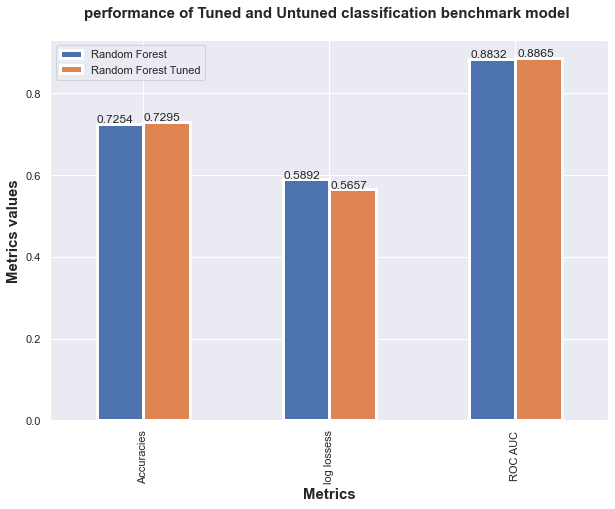

In [58]:
plt.rcParams["figure.figsize"] = (10,7)
ax=metriz_all_imp_tuned.T.plot(kind='bar',edgecolor='white',linewidth=3)
# plt.yticks((0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7,0.8,0.9,1), fontsize = 10)
plt.legend(loc='best')
plt.xlabel('Metrics',fontsize = 15,fontweight="bold")
plt.ylabel('Metrics values',fontsize = 15,fontweight="bold")
plt.title('performance of Tuned and Untuned classification benchmark model \n',
          fontsize = 15, fontweight="bold")
for p in ax.patches:
    ax.annotate(str(p.get_height().round(4)), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()